## Can film be clustered by their emotional tone? And do these cluster reveal distinct patterns in consumer ratings?

In [2]:
import pandas as pd
import numpy as np 
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../')
from utils.methods import *

df = pd.read_csv('../../data/final_data_complete.csv')

temp = pd.DataFrame(list(df['distilbert_emotions'].apply(conv_to_dict)))

emotions_df = pd.concat([df, temp], axis=1)
assert emotions_df["distilbert_emotions"].isna().sum() == emotions_df["Plot"].isna().sum()

In [3]:
emotions = ['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy']

filter_df = emotions_df.dropna(subset=['Plot'])

cluster_df = filter_df[emotions].reset_index(drop=True)
cluster_df.head()
cluster_df.to_csv('../../data/cluster.csv', index=False)

#### The data are already on the same scale and sum to 1 representing proportions of the emotional tone of the film so there is no need to normalize them. 

#### We start from doing some exploration of the data.

(33684, 7)
(235788, 2)


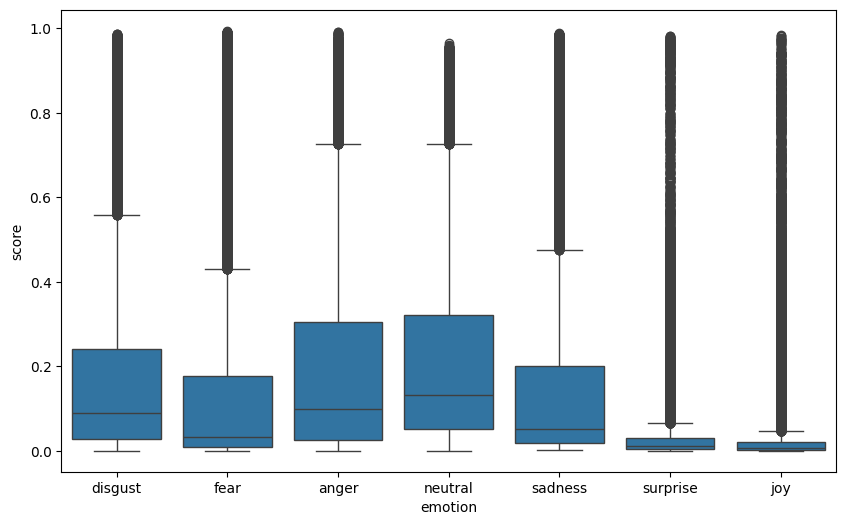

In [4]:
print(cluster_df.shape)

long_df = pd.melt(cluster_df, var_name='emotion', value_name='score')
print(long_df.shape)

plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='score', data=long_df)
plt.show()

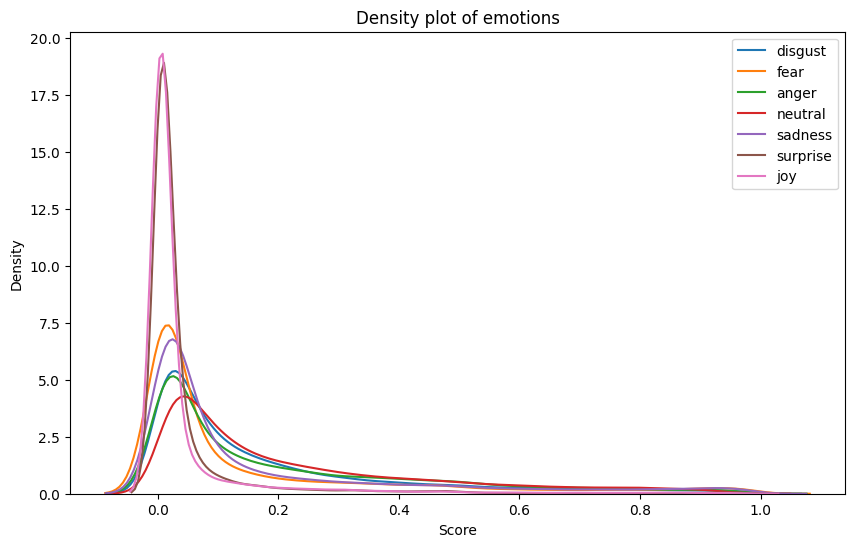

In [5]:
plt.figure(figsize=(10, 6))
for emotion in cluster_df.columns:
    sns.kdeplot(cluster_df[emotion], label=emotion, fill=False)
plt.xlabel('Score')
plt.legend()
plt.title('Density plot of emotions')
plt.show()


#### To start, we perform a Hierchical Clustering o the data and plot the dendrogram to see if there are any clear clusters.

#### We will perform Hierchical Clustering with average linkage and Cosine distance. The Cosine distance is chosen because it is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Thats works particularly well when the data are in distributed in a simplex like in this case.

#### Since Hierchical Clustiering computes dinstances between all pairs of points, it scales poorly with large dataset like ours. To have and understandig of the possible clusters we will use a subset of 500 data points.

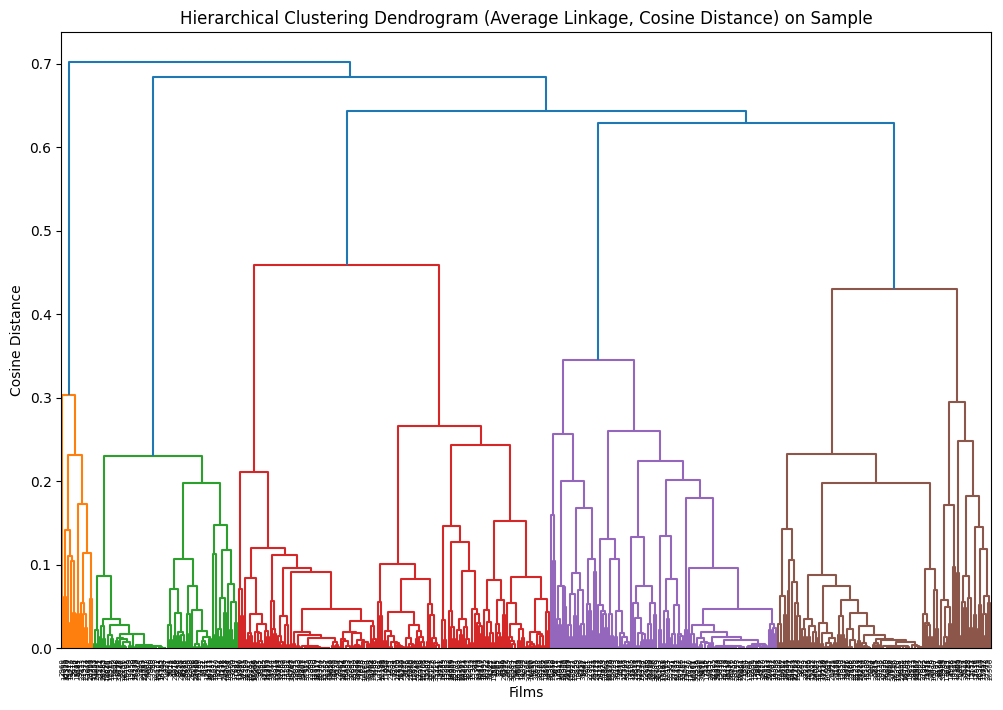

In [ ]:
#Perform Hierarchical Clustering with average linkage and cosine distance, no normalization
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

sample_df = cluster_df.sample(500, random_state=42)

distance_matrix = pdist(sample_df, metric='cosine')
linkage_matrix = linkage(distance_matrix, method='average')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=sample_df.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Average Linkage, Cosine Distance) on Sample')
plt.xlabel('Films')
plt.ylabel('Cosine Distance')
plt.show()
